# <span style="color:darkred">  Esercitazione 7 </span>


### Exercise 07.1

Use the Monte Carlo NVT code we have provided to >print out instantaneous values of potential energy per particle, $U/N$, and pressure, $P$, along equilibrated Monte Carlo simulations (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

#### Richiesta 1
Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ and $P$ to approximately estimate how large the blocks in your simulations should be.

##### Svolgimento

Di seguito sono riportati i grafici dell'andamento della funzione di autocorrelazione per i valori dell'energia potenziale e della pressione in tutte e tre le fasi.. Per calcolare la funzione di autocorrelazione ho imposto un $tmax = 500 steps$.

In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def AuC(x,tmax): #Funzione di autocorrelazione
    N = len(x)
    X = np.zeros(tmax)
    X4 = 0;
    X5 = 0;
    for t in range(0, N):
        X4 += (x[t]*x[t])
        X5 += (x[t])
        
    X4 = X4/N
    X5 = X5/N
    
    for T in range (0,tmax):
        X1 = 0;
        X2 = 0;
        X3 = 0;
        for t in range(0, N-T):
            X1 += (1./(N-T))*(x[t]*x[t+T])
            X2 += (1./(N-T))*(x[t])
            X3 += (1./(N-T))*(x[t+T])
        X[T] = (X1 - X2*X3)/(X4-X5*X5)
    return X

In [3]:
 def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

In [4]:
def ErrorBlocks(misura, M, B):##dati, numero totale di steps, numero di steps per blocchi
    N = int(M/B); #number of blocks
    ave = np.zeros(N)
    av2 = np.zeros(N)
    sum_prog = np.zeros(N)
    su2_prog = np.zeros(N)
    err_prog = np.zeros(N)

    for i in range(N):
        sum = 0
        for j in range(B):
            k = j+i*B
            sum += misura[k]
        ave[i] = sum/B       # m_i 
        av2[i] = (ave[i])**2 # (m_i)^2 

    for i in range(N):
        for j in range(i+1):
            sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
            su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
        sum_prog[i]/=(i+1) # Cumulative average
        su2_prog[i]/=(i+1) # Cumulative square average
        
        
    err = error(sum_prog,su2_prog,N-1) # Statistical uncertainty final block
    
    return err

In [5]:
M = 500000 #numero totale di steps

Solid_Epot = np.loadtxt("Es01/Solid_Epot.dat", usecols = (0), delimiter=' ', unpack='true')
Solid_Pres = np.loadtxt("Es01/Solid_Pres.dat", usecols = (0), unpack='true')

Liquid_Epot = np.loadtxt("Es01/Liquid_Epot.dat", usecols = (0), delimiter=' ', unpack='true')
Liquid_Pres = np.loadtxt("Es01/Liquid_Pres.dat", usecols = (0), unpack='true')

Gas_Epot = np.loadtxt("Es01/Gas_Epot.dat", usecols = (0), delimiter=' ', unpack='true')
Gas_Pres = np.loadtxt("Es01/Gas_Pres.dat", usecols = (0), unpack='true')



In [6]:
#parametri calcolo
tmax = 500
steps = np.arange(tmax)

In [7]:
##calcolo funzioni di autocorrelazione

AuC_ePot_Solid = AuC(Solid_Epot, tmax)
AuC_Pres_Solid = AuC(Solid_Pres, tmax)

In [8]:
AuC_ePot_Liquid = AuC(Liquid_Epot, tmax)
AuC_Pres_Liquid = AuC(Liquid_Pres, tmax)

In [9]:
AuC_ePot_Gas = AuC(Gas_Epot, tmax)
AuC_Pres_Gas = AuC(Gas_Pres, tmax)

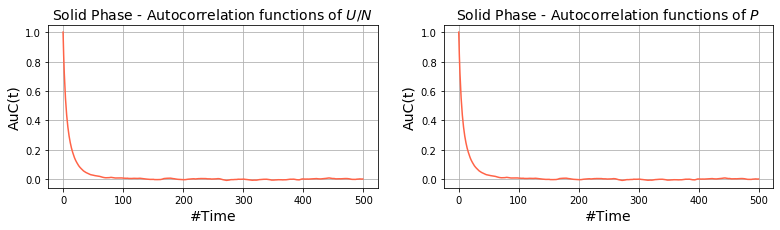

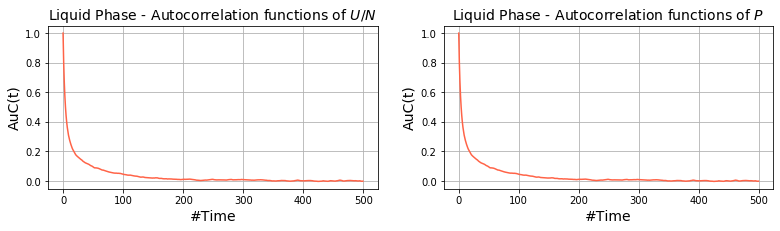

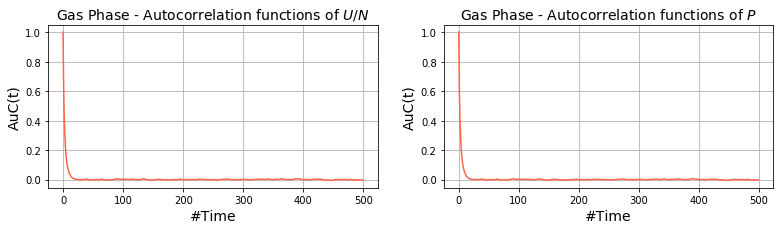

In [17]:
### Plot funzioni di auto correlazione

plt.figure(1, figsize=(13,3))
plt.subplot(121)
plt.plot(steps, AuC_ePot_Solid, color = 'tomato')
plt.title('Solid Phase - Autocorrelation functions of $U/N$', fontsize= 14)
plt.xlabel('#Time', fontsize= 14)
plt.ylabel('AuC(t)', fontsize= 14)
plt.grid(True)


plt.subplot(122)
plt.plot(steps, AuC_Pres_Solid, color = 'tomato')
plt.title('Solid Phase - Autocorrelation functions of $P$', fontsize= 14)
plt.xlabel('#Time', fontsize= 14)
plt.ylabel('AuC(t)', fontsize= 14)
plt.grid(True)
plt.show()

plt.figure(2, figsize=(13,3))
plt.subplot(121)
plt.plot(steps, AuC_ePot_Liquid, color = 'tomato')
plt.title('Liquid Phase - Autocorrelation functions of $U/N$', fontsize= 14)
plt.xlabel('#Time', fontsize= 14)
plt.ylabel('AuC(t)', fontsize= 14)
plt.grid(True)


plt.subplot(122)
plt.plot(steps, AuC_Pres_Liquid, color = 'tomato')
plt.title('Liquid Phase - Autocorrelation functions of $P$', fontsize= 14)
plt.xlabel('#Time', fontsize= 14)
plt.ylabel('AuC(t)', fontsize= 14)
plt.grid(True)
plt.show()

plt.figure(3, figsize=(13,3))
plt.subplot(121)
plt.plot(steps, AuC_ePot_Gas, color = 'tomato')
plt.title('Gas Phase - Autocorrelation functions of $U/N$', fontsize= 14)
plt.xlabel('#Time', fontsize= 14)
plt.ylabel('AuC(t)', fontsize= 14)
plt.grid(True)


plt.subplot(122)
plt.plot(steps, AuC_Pres_Gas, color = 'tomato')
plt.title('Gas Phase - Autocorrelation functions of $P$', fontsize= 14)
plt.xlabel('#Time', fontsize= 14)
plt.ylabel('AuC(t)', fontsize= 14)
plt.grid(True)
plt.show()

Dall'andamento dei grafici si osserva la fase gassosa è dove le misure più facilmente si scorrelano, mentre la fase liquida è quella che si scorrela più tardi. Anche se mi sarei aspettato che questo accadesse per la fase solida. 

Per tutte le fasi pressione e energia potenziale risultano scorrelate dopo un dT = 500. 

#### Richiesta 2

Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ and $P$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. Make pictures of these statistical uncertainties as a function of $L$. What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

##### Svolgimento

Ho eseguito l'analisi andando a scegliere come vettore $L = [10,50,100,500,1000,5000]$ (nel codice è l'oggetto **B**). I grafici ottenuti sono riportati più sotto.

In [18]:
B = [10,50,100,500,1000,5000] #:= M/N, N = [50000,10000,5000,1000,500,100] numbers of blocks

#studio errore ePotenziale
Error_Pot_Solid = np.zeros(len(B))
Error_Pres_Solid = np.zeros(len(B))

Error_Pot_Liquid = np.zeros(len(B))
Error_Pres_Liquid = np.zeros(len(B))

Error_Pot_Gas = np.zeros(len(B))
Error_Pres_Gas = np.zeros(len(B))

In [20]:
#studio errore Pressione e Potenziale
for i in range(len(B)):
    Error_Pot_Solid[i] = ErrorBlocks(Solid_Epot, M, B[i])
    Error_Pres_Solid[i] = ErrorBlocks(Solid_Pres, M, B[i])

In [21]:
for i in range(len(B)):
    Error_Pot_Liquid[i] = ErrorBlocks(Liquid_Epot, M, B[i])
    Error_Pres_Liquid[i] = ErrorBlocks(Liquid_Pres, M, B[i])

In [22]:
for i in range(len(B)):    
    Error_Pot_Gas[i] = ErrorBlocks(Gas_Epot, M, B[i])
    Error_Pres_Gas[i] = ErrorBlocks(Gas_Pres, M, B[i])

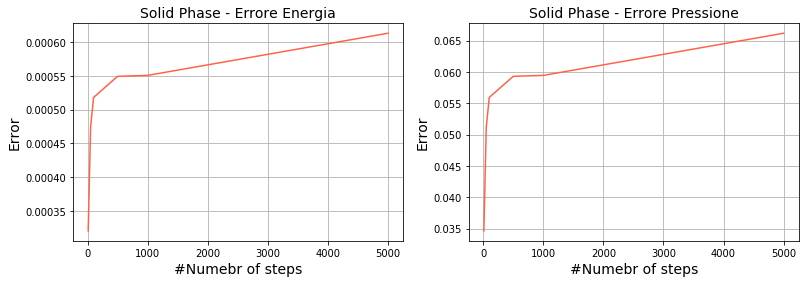

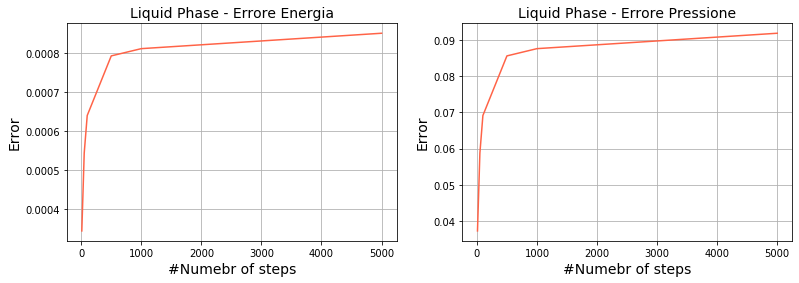

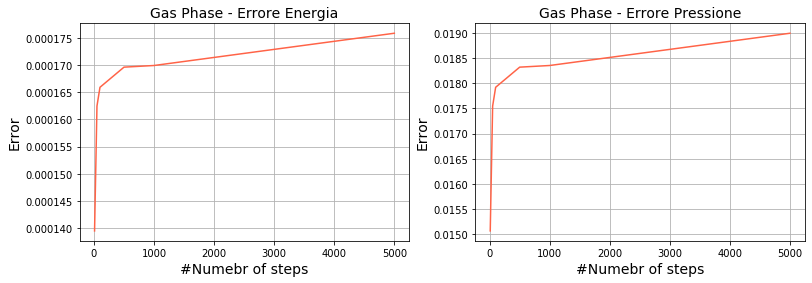

In [26]:
plt.figure(1, figsize=(13,4))
plt.subplot(121)
plt.plot(B, Error_Pot_Solid, color = 'tomato')
plt.title('Solid Phase - Errore Energia', fontsize= 14)
plt.xlabel('#Numebr of steps', fontsize= 14)
plt.ylabel('Error', fontsize= 14)
plt.grid(True)

plt.subplot(122)
plt.plot(B, Error_Pres_Solid, color = 'tomato')
plt.title('Solid Phase - Errore Pressione', fontsize= 14)
plt.xlabel('#Numebr of steps', fontsize= 14)
plt.ylabel('Error', fontsize= 14)
plt.grid(True)
plt.show()

plt.figure(2, figsize=(13,4))
plt.subplot(121)
plt.plot(B, Error_Pot_Liquid, color = 'tomato')
plt.title('Liquid Phase - Errore Energia', fontsize= 14)
plt.xlabel('#Numebr of steps', fontsize= 14)
plt.ylabel('Error', fontsize= 14)
plt.grid(True)

plt.subplot(122)
plt.plot(B, Error_Pres_Liquid, color = 'tomato')
plt.title('Liquid Phase - Errore Pressione', fontsize= 14)
plt.xlabel('#Numebr of steps', fontsize= 14)
plt.ylabel('Error', fontsize= 14)
plt.grid(True)
plt.show()

plt.figure(3, figsize=(13,4))
plt.subplot(121)
plt.plot(B, Error_Pot_Gas, color = 'tomato')
plt.title('Gas Phase - Errore Energia', fontsize= 14)
plt.xlabel('#Numebr of steps', fontsize= 14)
plt.ylabel('Error', fontsize= 14)
plt.grid(True)

plt.subplot(122)
plt.plot(B, Error_Pres_Gas, color = 'tomato')
plt.title('Gas Phase - Errore Pressione', fontsize= 14)
plt.xlabel('#Numebr of steps', fontsize= 14)
plt.ylabel('Error', fontsize= 14)
plt.grid(True)
plt.show()

Dall'andamento dei grafici si osserva che, per tutte e tre le fasi, l'errore risulta sottostimato sotto a 500 steps, in quanto le misure sono ancora tra di loro correlate (come visto prima). Dopo 500 steps invece l'errore inizia a saturare. Per questo motivo ho deciso nell'esercizio successivo di prendere come grandezza per i blocchi 5000 steps. 

### Exercise 07.2, 3, 4 

By means of your upgraded MC code, equilibrate and perform MC NVT simulations via a Lennard-Jones model of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in SI units ...  and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.

_______________________________________
##### Svolgimento

Per svolgere questo esercizio sono andato a svolgere delle simulazione formate da 20 blocchi di lunghezza 5000 steps ciascuno, in maniera tale da non considerare un errore sottostimato, come visto in precedenza. 

Per le misure della **g(r)** misurate con il Molecolar Dynamics NVE, mi è stato necessario andare ad equilibrare il sistema attraverso una serie si multi-short simulations, con le quali ho portato il sistema alla temperatura desiderata. A quel punto ho eseguito le misure di lunghezza pari al MC NVE.

In [6]:
M = 20 #numero di blocchi
x = np.arange(M)

#parametri fisici
T0 = 120 #e/Kb
Kb = 0.00008167332262 # eV/K
eV = 1.602176634e-19
sigma = 0.34e-09 ##converto in metri
s3 = sigma*sigma*sigma
Pa = 101325 # Pascal


##Carico le misure
Epot_solid, error_Epot_solid  = np.loadtxt("Es02/solid.epot.dat", usecols = (2,3), unpack='true')* T0*Kb
Pres_solid, error_Pres_solid  = np.loadtxt("Es02/solid.pres.dat", usecols = (2,3), unpack='true')* (T0*Kb*eV)/(s3*Pa)

Epot_liquid, error_Epot_liquid  = np.loadtxt("Es02/liquid.epot.dat", usecols = (2,3), unpack='true')* T0*Kb
Pres_liquid, error_Pres_liquid  = np.loadtxt("Es02/liquid.pres.dat", usecols = (2,3), unpack='true')* (T0*Kb*eV)/(s3*Pa)

Epot_gas, error_Epot_gas  = np.loadtxt("Es02/gas.epot.dat", usecols = (2,3), unpack='true')* T0*Kb
Pres_gas, error_Pres_gas  = np.loadtxt("Es02/gas.pres.dat", usecols = (2,3), unpack='true')* (T0*Kb*eV)/(s3*Pa)

r_solid, GdiR_solid, error_gdir_solid  = np.loadtxt("Es02/solid.gave.dat", usecols = (0,2,3), unpack='true')
r_solid2, GdiR_solid2, error_gdir_solid2  = np.loadtxt("Es03/solid.gofr.dat", usecols = (0,2,3), unpack='true')

r_liquid, GdiR_liquid, error_gdir_liquid  = np.loadtxt("Es02/liquid.gave.dat", usecols = (0,2,3), unpack='true')
r_liquid2, GdiR_liquid2, error_gdir_liquid2  = np.loadtxt("Es03/liquid.gofr.dat", usecols = (0,2,3), unpack='true')

r_gas, GdiR_gas, error_gdir_gas  = np.loadtxt("Es02/gas.gave.dat", usecols = (0,2,3), unpack='true')
r_gas2, GdiR_gas2, error_gdir_gas2  = np.loadtxt("Es03/gas.gofr.dat", usecols = (0,2,3), unpack='true')

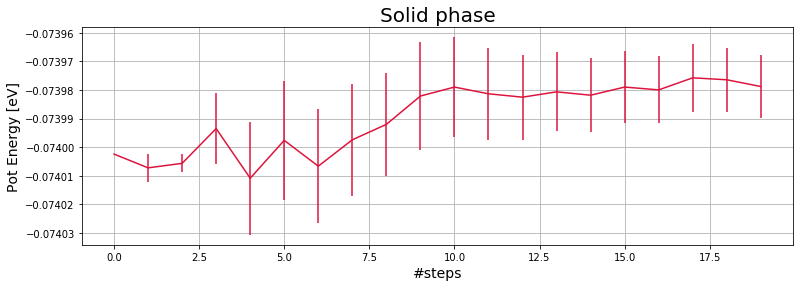

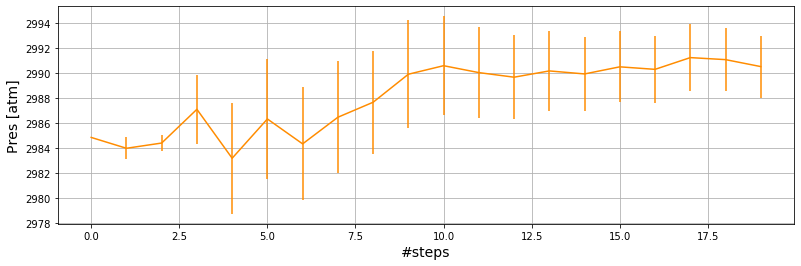

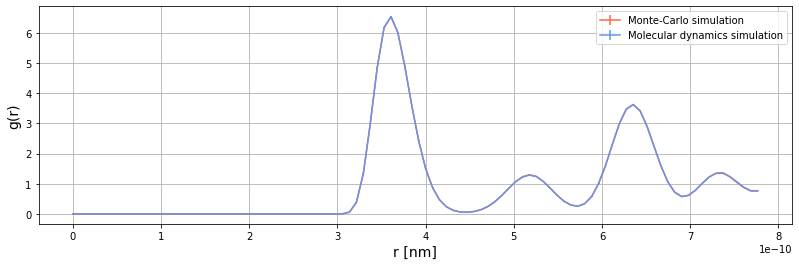

In [7]:
plt.figure(1, figsize=(12.75,4))
plt.title('Solid phase', fontsize= 20)
plt.errorbar(x, Epot_solid, yerr=error_Epot_solid, color='crimson', label ='T_Data')
plt.xlabel('#steps',fontsize= 14)
plt.ylabel('Pot Energy [eV]',fontsize= 14)
plt.grid(True)

plt.figure(2, figsize=(13.2,4))
plt.errorbar(x, Pres_solid ,yerr=error_Pres_solid, color='darkorange')
plt.xlabel('#steps',fontsize= 14)
plt.ylabel('Pres [atm]',fontsize= 14)
plt.grid(True)

plt.figure(3, figsize=(13.5,4))
plt.errorbar(r_solid*sigma, GdiR_solid, yerr=error_gdir_solid, color = 'tomato', label = 'Monte-Carlo simulation')
plt.errorbar(r_solid2*sigma, GdiR_solid2, yerr=error_gdir_solid2, color = 'cornflowerblue', label = 'Molecular dynamics simulation')
plt.xlabel('r [nm]', fontsize= 14)
plt.ylabel('g(r)', fontsize= 14)
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

Mi soffermo sul grafico della $g(r)$ per osservare che la simulazione Monte Carlo e la simulazione tramite Molecular Dynamics riproducono esattamente lo stesso grafico. Inoltre si osservano bene le posizioni dei primi vicini all'interno del cristallo di gas nobile. 

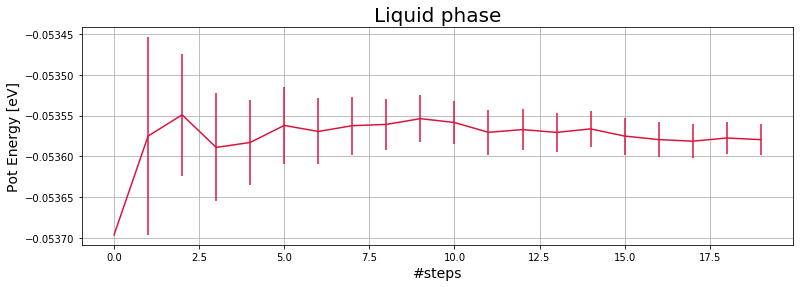

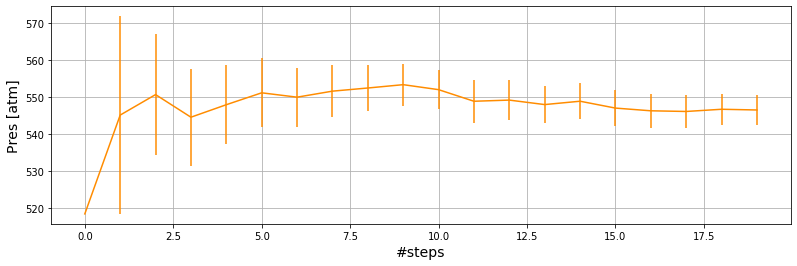

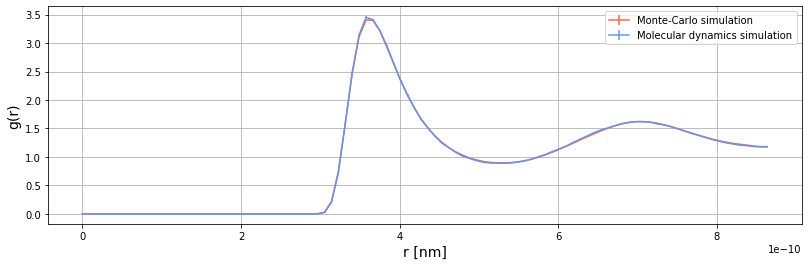

In [8]:
plt.figure(1, figsize=(12.75,4))
plt.title('Liquid phase', fontsize= 20)
plt.errorbar(x, Epot_liquid, yerr=error_Epot_liquid, color='crimson', label ='T_Data')
plt.xlabel('#steps',fontsize= 14)
plt.ylabel('Pot Energy [eV]',fontsize= 14)
plt.grid(True)

plt.figure(2, figsize=(13.25,4))
plt.errorbar(x, Pres_liquid ,yerr=error_Pres_liquid, color='darkorange')
plt.xlabel('#steps',fontsize= 14)
plt.ylabel('Pres [atm]',fontsize= 14)
plt.grid(True)

plt.figure(3, figsize=(13.5,4))
plt.errorbar(r_liquid*sigma, GdiR_liquid, yerr=error_gdir_liquid, color = 'tomato', label = 'Monte-Carlo simulation')
plt.errorbar(r_liquid2*sigma, GdiR_liquid2, yerr=error_gdir_liquid2, color = 'cornflowerblue', label = 'Molecular dynamics simulation')
plt.xlabel('r [nm]', fontsize= 14)
plt.ylabel('g(r)', fontsize= 14)
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

Anche in questo stato, la simulazione Monte Carlo e la simulazione tramite Molecular Dynamics riproducono praticamente lo stesso grafico.

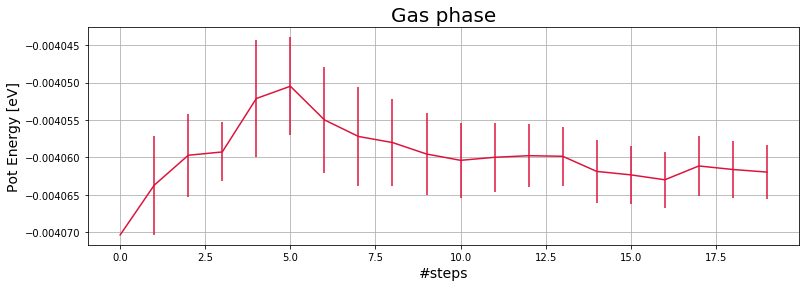

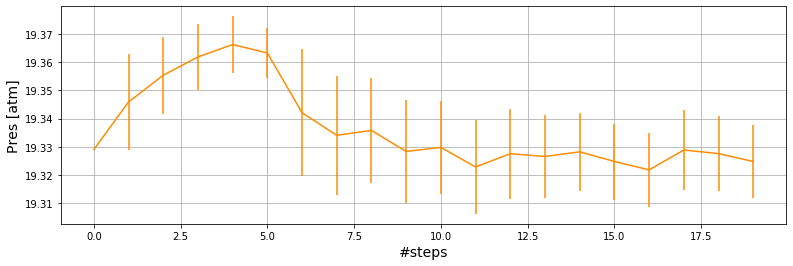

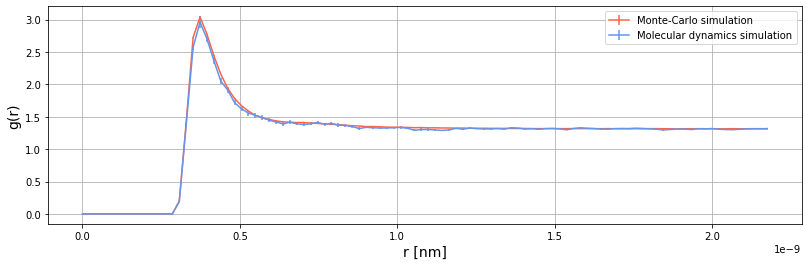

In [9]:
plt.figure(1, figsize=(12.75,4))
plt.title('Gas phase', fontsize= 20)
plt.errorbar(x, Epot_gas, yerr=error_Epot_gas, color='crimson', label ='T_Data')
plt.xlabel('#steps',fontsize= 14)
plt.ylabel('Pot Energy [eV]',fontsize= 14)
plt.grid(True)

plt.figure(2, figsize=(13,4))
plt.errorbar(x, Pres_gas ,yerr=error_Pres_gas, color='darkorange')
plt.xlabel('#steps',fontsize= 14)
plt.ylabel('Pres [atm]',fontsize= 14)
plt.grid(True)

plt.figure(3, figsize=(13.5,4))
plt.errorbar(r_gas*sigma, GdiR_gas, yerr=error_gdir_gas, color = 'tomato', label = 'Monte-Carlo simulation')
plt.errorbar(r_gas2*sigma, GdiR_gas2, yerr=error_gdir_gas2, color = 'cornflowerblue', label = 'Molecular dynamics simulation')
plt.xlabel('r [nm]', fontsize= 14)
plt.ylabel('g(r)', fontsize= 14)
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

Nel caso del gas invece si osserva come ci sia una maggiore discrepanza fra i due grafici rispetto agli stati precedenti. Questo è dovuto al fatto che per lo stato gassoso è più difficile, durante la simulazione di dinamica molecolare, rimanere durante tutta la simulazione alla temperatura desiderata. 

Nel grafico successivo è riportato l'andamento della temperatura durante le simulazioni di dinamica molecolare precedenti. Quello che si osserva è che lo stato liquido e solido riescono a mantenere più facilmente la temperatura costante, in un intorno della temperatura desiderata. Questo non succede invece per lo stato gassoso.

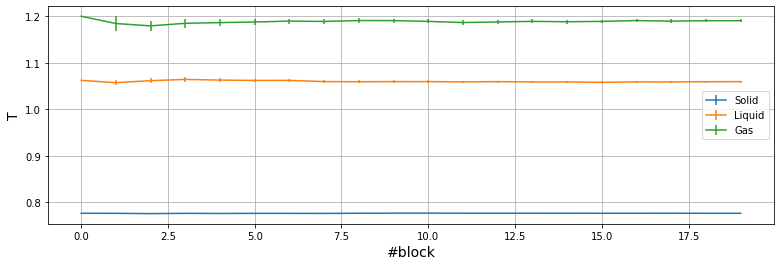

In [25]:
x = np.arange(20)

temp_solid, error_solid  = np.loadtxt("Es03/solid.temp.dat", usecols = (2,3), unpack='true')
temp_liquid, error_liquid  = np.loadtxt("Es03/liquid.temp.dat", usecols = (2,3), unpack='true')
temp_gas, error_gas  = np.loadtxt("Es03/gas.temp.dat", usecols = (2,3), unpack='true')

plt.figure(1, figsize=(13,4))
plt.errorbar(x,temp_solid, yerr = error_solid, label = 'Solid')
plt.errorbar(x,temp_liquid, yerr = error_liquid, label = 'Liquid')
plt.errorbar(x,temp_gas, yerr = error_gas, label = 'Gas')
plt.xlabel('#block', fontsize= 14)
plt.ylabel('T', fontsize= 14)
plt.legend(loc = 'best')
plt.grid(True)
plt.show()